# Module 3: 数据探索 Data Exploration


以下教程包含用于数据探索的Python代码示例。 参考“数据挖掘导论”一书。本教程笔记本中介绍的概念。 可以从http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.ipynb 下载笔记本。

数据探索是指对数据进行顺序的初步调查
以更好地了解其具体特征。 数据探索有两个主要动机：
1. 帮助用户选择合适的预处理和数据分析技术。
2. 利用人类的能力来识别数据中的模式。

请仔细阅读下面的分步说明。 要执行代码，请单击单元格，然后同时按SHIFT-ENTER键。

## 3.1. 汇总统计 Summary Statistics


汇总统计是一种定量分析，用于获取数据量大但数值类型少的数据的多种特征，例如平均值和标准偏差。 在本教程中，我们将使用鸢尾花（Iris）样本数据，该数据包含150种鸢尾花的信息，其中三种鸢尾花中的一种鸢尾花（Setosa，Versicolour和Virginica）每种花50种。 每朵花都有五个属性：

- 萼片长度（厘米）

- 萼片宽度（厘米）

- 花瓣长度（厘米）

- 花瓣宽度（厘米）

- 类别（Setosa，Versicolour，Virginica）

在本教程中，您将学习如何：

- 将CSV数据文件加载到Pandas DataFrame对象中。

- 从DataFrame计算各种摘要统计信息。

要执行此处显示的示例程序，请确保已安装Pandas库（请参阅模块2）。

**<font color ='red'>任务：</font>** 请查阅pandas文档，并尝试其它内置的函数进行数据的汇总统计分析。


**1.** 首先，需要从UCI机器学习库下载 <a href="http://archive.ics.uci.edu/ml/datasets/Iris"> Iris数据集</a>。

**<font color ='red'>代码：</font>** 以下代码使用Pandas读取CSV文件并将其存储在名为data的DataFrame对象中。 接下来，它将显示数据帧的前五行。



In [1]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**2.** 对于每个定量属性，计算其平均值，标准偏差，最小值和最大值。

**<font color="red">代码：</font>**

In [2]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


**3.** 对于定性属性（类），计算其每个不同值的频率。

**<font color="red">代码：</font>**

In [3]:
data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**4.** 也可以使用describe()函数在表中同时显示所有属性的摘要。 如果是定量属性，它将显示其均值，标准差和各种分位数（包括最小值，中位数和最大值）。 如果属性是定性的，它将显示其唯一值的数量和最常见（top，频率最高）的值。

**<font color="red">代码：</font>**

**<font color ='red'>思考：</font>** 请分析下述代码运行结果中每种指标的意义（count、unique、top等），并尝试解释为什么会出现NaN。

In [4]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


注意，count是指每个属性的非缺失值的数量。

**5.** 对于多元统计量，可以计算属性对之间的协方差（covariance）和相关性（correlation）。

**<font color="red">代码：</font>**

**<font color ='red'>思考：</font>** 请描述你对于协方差和相关性的理解，并分析分析下述代码运行结果中值的高低分别代表什么意义。

In [5]:
print('Covariance:')
data.loc[:, data.columns != 'class'].cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [6]:
print('Correlation:')
data.loc[:, data.columns != 'class'].corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 3.2. 数据可视化

数据可视化是以图形或表格形式显示信息。 成功的可视化要求将数据（信息）转换为可视格式（visual format），以便可以被分析或报告数据的特性和数据项/属性之间关系的差异。

在本教程中，我们会学习如何显示在3.1节中创建的Iris数据。 要执行此处显示的示例程序，请确保已安装matplotlib库软件包（有关如何安装Python软件包，请参见模块0）。


**1.** 首先，我们将通过将萼片长度属性离散化为8个单独的bin并计算每个bin的频率来显示直方图。

**<font color="red">代码：</font>**

**<font color="red">任务：</font>** 请查阅matplotlib文档，并探索各种数据可视化方法。

<Axes: >

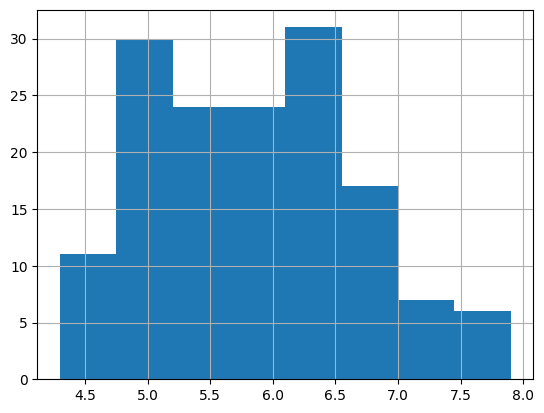

In [7]:
%matplotlib inline

data['sepal length'].hist(bins=8)

**2.** 使用箱型图（boxplot）展示每个属性值的分布

**2.1** 中位数
中位数，即二分之一分位数。将数据从小到大进行排序，若数据的个数n是基数，则中位数所在的位置即为(n+1)/2的位置。若数据的个数n是偶数，则中位数为第n/2、第n/2+1两个数的算数平均值。

**2.2** 下四分位数Q1
四分之一分位数位于箱型图的下方，所以也叫“下四分位数”。
强调一下，四分位数的求法，是将序列平均分成四份。具体的计算目前有(n+1)/4与(n-1)/4两种，一般使用(n+1)/4，即四分之一分位数即第(n+1)/4个数，当然这个结果可能是个分数。结果是分数时，具体的计算后文再讲。

**2.3** 上四分位数Q3
四分之三分位数位于箱型图的上方，所以也叫“上四分位数”。
强调一下，四分位数的求法，是将序列平均分成四份。具体的计算目前有(n+1)/43与(n-1)/43两种，一般使用(n+1)/43，即四分之三分位数即第(n+1)/43个数。

**2.4** 内限
目前我们文章中看到的这两个T形的盒须就是内限。上面的T形线段所延伸到的极远处，是Q3+1.5IQR(其中，IQR=Q3-Q1)与剔除异常值后的极大值两者取最小，下面的T形线段所延伸到的极远处，是Q1-1.5IQR与剔除异常值后的极小值两者取最大。

**2.5** 异常值（圆圈）

**<font color="red">代码：</font>**


<Axes: >

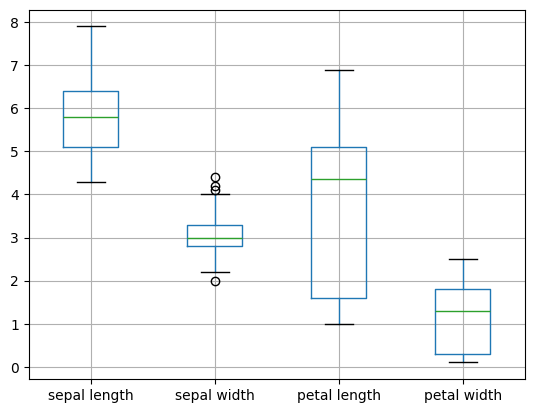

In [8]:
data.boxplot()

**3.** 对于每对属性，我们可以使用散点图对它们的联合分布进行可视化。

**<font color="red">代码：</font>**

**<font color ='red'>思考：</font>** 请根据下述代码结果分析各种属性之间的关联关系。

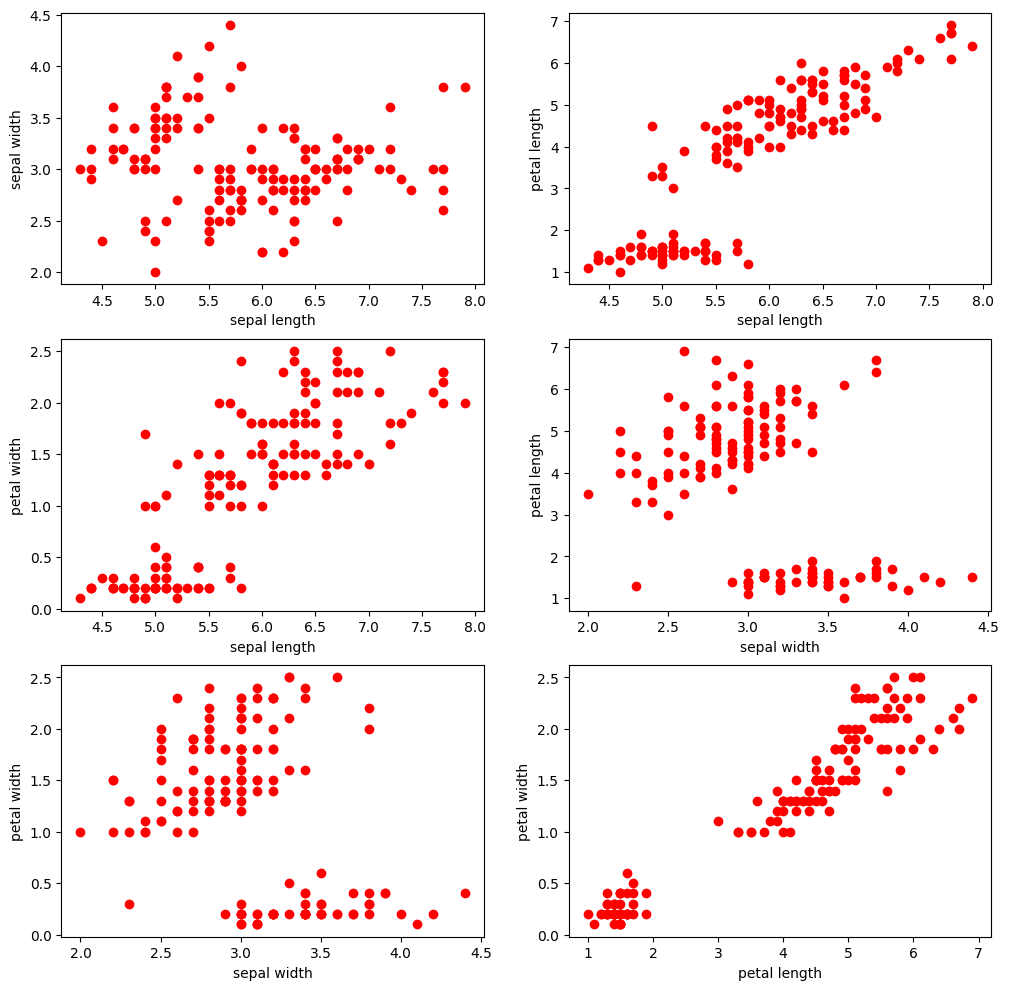

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

**4.** 平行坐标可用于同时显示所有数据点。 平行坐标的每个属性都有一个坐标轴，但是不同的坐标轴彼此平行，而不是像传统的那样垂直。 此外，每个对象被表示为线而不是点。 在下面的示例中，可以使用单独的颜色标识每个类别的值的分布。

**<font color="red">代码：</font>**

<Axes: >

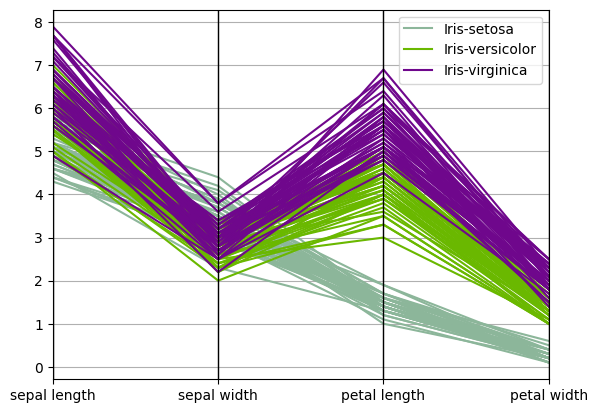

In [10]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

## 3.3. 总结

本教程介绍了几个使用Python中可用的Pandas和matplotlib库软件包进行数据探索和可视化的示例。

**<font color='blue'>参考：</font>**

1. Pandas文档： https://pandas.pydata.org/
2. matplotlib文档： https://matplotlib.org/
3. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 